## Weiteres zu Regressionen

Im folgenden sollen noch weitere Aspekte zu Regressionen vorgestellt werden - zum einen werden wir jetzt mit mehr Features arbeiten, die Modelle werden komplexer (und eventuell auch zu komplex).

In [4]:
# einige Importe
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures

Wir beginnen erneut mit einem einfachen zufälligen Datensatz mit einem Feature X und Targets Y:

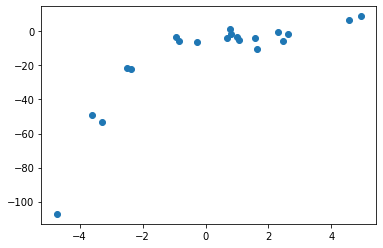

In [21]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# x wird noch in Spaltenform gebracht
x = x[:, np.newaxis]

plt.scatter(x, y);

Ein linearer Zusammenhang beschreibt die Daten nicht sehr gut - führen wir dennoch zunächst eine lineare Regression durch:

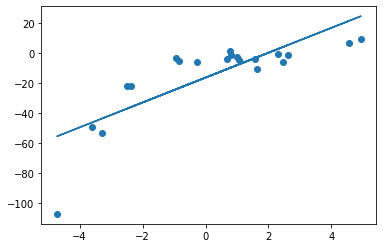

In [74]:
model = SGDRegressor()
model.fit(x, y)

y_pred = model.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred);

Statt einem linearen könnte hier auch ein polynomielles Modell genutzt werden. Unser Regressionsmodel ist allerdings linear - stattdessen fügen wir unserer Datenmatrix X noch weitere Spalten (Features) hinzu, in denen wir die Werte z.B. quadrieren:

In [75]:
x_poly = np.c_[x, x**2]
x_poly

array([[-3.29215704, 10.83829796],
       [ 0.79952837,  0.63924562],
       [-0.93621395,  0.87649656],
       [-4.7226796 , 22.30370258],
       [-3.60267397, 12.97925974],
       [ 4.93183364, 24.32298305],
       [-0.85026525,  0.722951  ],
       [ 2.45407162,  6.02246754],
       [ 2.30965656,  5.3345134 ],
       [ 0.76820449,  0.59013814],
       [ 1.56786929,  2.4582141 ],
       [-2.36282052,  5.58292081],
       [-0.28311318,  0.08015307],
       [ 1.63497495,  2.67314309],
       [ 0.6684103 ,  0.44677233],
       [ 0.99897702,  0.99795508],
       [-2.48223722,  6.16150161],
       [ 2.61547479,  6.84070838],
       [ 1.0607969 ,  1.12529005],
       [ 4.56228722, 20.81446466]])

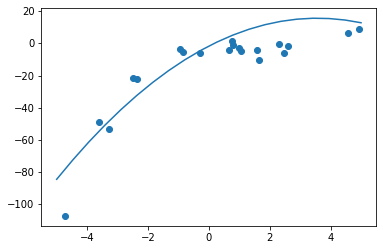

In [76]:
model2 = SGDRegressor()
model2.fit(x_poly, y)

y_pred = model2.predict(x_poly)
plt.scatter(x, y)

x_axis = np.linspace(-5, 5, 20)
plt.plot(x_axis, model2.predict(np.c_[x_axis, x_axis**2]));

In __sklearn__ ist das Erzeugen von polynomiellen Features bereits implementiert:

In [31]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
x_poly

array([[ 1.        , -3.29215704, 10.83829796],
       [ 1.        ,  0.79952837,  0.63924562],
       [ 1.        , -0.93621395,  0.87649656],
       [ 1.        , -4.7226796 , 22.30370258],
       [ 1.        , -3.60267397, 12.97925974],
       [ 1.        ,  4.93183364, 24.32298305],
       [ 1.        , -0.85026525,  0.722951  ],
       [ 1.        ,  2.45407162,  6.02246754],
       [ 1.        ,  2.30965656,  5.3345134 ],
       [ 1.        ,  0.76820449,  0.59013814],
       [ 1.        ,  1.56786929,  2.4582141 ],
       [ 1.        , -2.36282052,  5.58292081],
       [ 1.        , -0.28311318,  0.08015307],
       [ 1.        ,  1.63497495,  2.67314309],
       [ 1.        ,  0.6684103 ,  0.44677233],
       [ 1.        ,  0.99897702,  0.99795508],
       [ 1.        , -2.48223722,  6.16150161],
       [ 1.        ,  2.61547479,  6.84070838],
       [ 1.        ,  1.0607969 ,  1.12529005],
       [ 1.        ,  4.56228722, 20.81446466]])

Nutzen wir dieses Feature, um ein Polynom vom Grad 10 zu fitten:

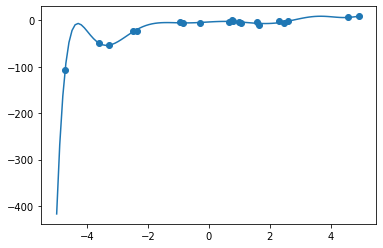

In [78]:
from sklearn.linear_model import LinearRegression

polynomial_features= PolynomialFeatures(degree=10)
x_poly = polynomial_features.fit_transform(x)

# hier nutzen wir einmal die sklearn-Implementierung ohne Gradientenabstieg
# denn der ist bei Polynomen mit hohem Grad sehr instabil
model3 = LinearRegression()
model3.fit(x_poly, y)

plt.scatter(x, y)

x_axis = np.linspace(-5, 5, 100)[:, np.newaxis]
plt.plot(x_axis, model3.predict(polynomial_features.fit_transform(x_axis)));


Wir sehen - dies ist ein klassischer Fall von Overfitting. Das gewählte Model ist zu kompliziert. Es hat zwar einen sehr geringen Fehler (Datenpunkte liegen fast alle auf dem Polynomgraphen), aber die Vorhersagen dieses Models werden für x < -4 sehr unrealistisch.

Ein Model, welches simplifiziert, und nicht sehr genau auf die Trainingsdaten anpasst, hat einen hohen _bias_ (wie das Model mit Grad 1).

Ein Model, welches sehr variabel ist, und sich daher sehr genau an Trainingsdaten anpasst (wie das Modell mit Grad 10) hat eine sehr hohe _variance_.

Beide Extreme führen zu schlechten Ergebnissen, das optimale Model liegt im Kompromiss dazwischen - man spricht daher vom _bias / variance tradeoff_.

## Beispiel: Boston house prices

Im folgenden wollen wir noch einige weitere Regressionen mit einem Beispieldatensatz rechnen:

In [117]:
import sklearn.datasets
import pandas as pd

data = sklearn.datasets.load_boston()

# TODO die folgende Zeile liefert etwas Dokumentation zum Datensatz
# print(data.DESCR)

In [83]:
# verpacken wir die Daten in ein Pandas Dataframe
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [118]:
# und die Zielwerte werden ebenfalls in Pandas verpackt
df_target = pd.DataFrame(data.target, columns=['price'])
df_target.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [104]:
# Betrachten wir, wie die Features mit dem Hauspreis korrelieren
combined = pd.concat([df, df_target], axis=1)
combined.corr()[['price']].sort_values(by='price')

,price
LSTAT,-0.737663
PTRATIO,-0.507787
INDUS,-0.483725
TAX,-0.468536
NOX,-0.427321
CRIM,-0.388305
RAD,-0.381626
AGE,-0.376955
CHAS,0.175260
DIS,0.249929


In [119]:
# Wir splitten die Daten in Training und Testset, damit wir 
# unsere Modelle validieren können
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [106]:
# für die lineare Regression mit Gradientenabstieg empfielt es sich,
# die Daten zu standardisieren
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

sgd_regression_model = Pipeline([
        ('scale', StandardScaler()),
        ('regression', SGDRegressor())])


sgd_regression_model.fit(X_train, Y_train);

In [107]:
from sklearn.metrics import mean_squared_error, r2_score

# eine Hilfsmethode, die zwei Metriken ausgibt:
# RMSE (root mean squared error)
# r2 (Anteil der erklärten Varianz)
def eval_model(model, X_train, X_test, Y_train, Y_test):
    y_train_predict = model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
    r2 = r2_score(Y_train, y_train_predict)

    print("Model performance (training)")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y_test_predict = model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
    r2 = r2_score(Y_test, y_test_predict)

    print("Model performance (test)")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

In [108]:
# evaluieren wir das erste Model
eval_model(sgd_regression_model, X_train, X_test, Y_train, Y_test)

Model performance (training)
--------------------------------------
RMSE is 4.749676415588394
R2 score is 0.7373809052451525


Model performance (test)
--------------------------------------
RMSE is 4.553426728012901
R2 score is 0.7351811155778056


In [109]:
# zum Vergleich trainieren wir noch einen RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, Y_train);

eval_model(rf, X_train, X_test, Y_train, Y_test)

Model performance (training)
--------------------------------------
RMSE is 1.1985766771528852
R2 score is 0.9832763950921442


Model performance (test)
--------------------------------------
RMSE is 3.211770822700297
R2 score is 0.8682467479477542


In [114]:
# ... und noch einmal mit GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

eval_model(gbr, X_train, X_test, Y_train, Y_test)

Model performance (training)
--------------------------------------
RMSE is 1.3759656542440657
R2 score is 0.9779599060868908


Model performance (test)
--------------------------------------
RMSE is 3.0773878107672843
R2 score is 0.8790414128899271


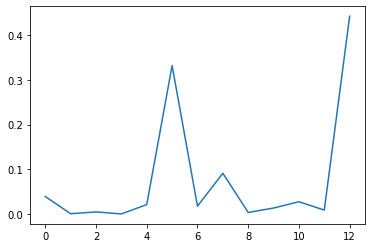

In [115]:
# Bonus: Wir können betrachten, welche Features beim Gradient-Boosting
# wie wichtig sind
plt.plot(range(len(gbr.feature_importances_)), gbr.feature_importances_)

<IPython.core.display.Javascript object>


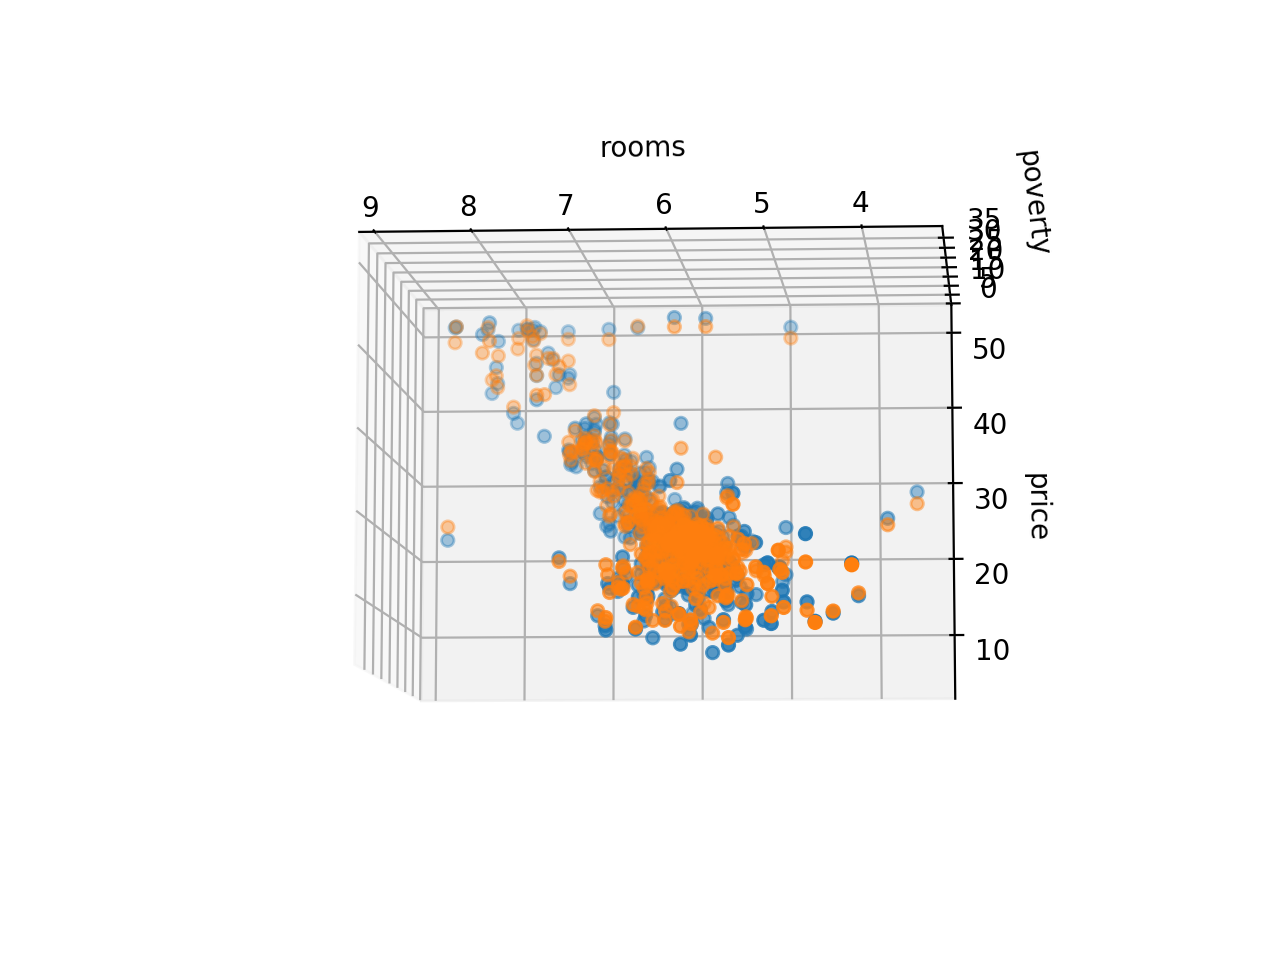

In [116]:
# Bonus 2: Wir plotten einmal die Daten, und die 
# Vorhersagen des Gradient-Boosting-Modells
# Achse 1: wichtigstes Feature
# Achse 2: zweitwichtigstes Feature
# Achse 3: Hauspreis

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('rooms')
ax.set_ylabel('poverty')
ax.set_zlabel('price')
ax.scatter(data.data[:,5], data.data[:,12], data.target)
ax.scatter(data.data[:,5], data.data[:,12], gbr.predict(data.data))

plt.show()